In [36]:
# !pip install pyarrow

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df  = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-03.parquet')

In [39]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-03-01 00:17:16,2025-03-01 00:25:52,1.0,0.90,1.0,N,140,236,1,7.9,3.50,0.5,2.60,0.0,1.0,15.50,2.5,0.0,0.00
1,1,2025-03-01 00:37:38,2025-03-01 00:43:51,1.0,0.60,1.0,N,140,262,1,6.5,3.50,0.5,2.30,0.0,1.0,13.80,2.5,0.0,0.00
2,2,2025-03-01 00:24:35,2025-03-01 00:39:49,1.0,1.94,1.0,N,161,68,1,14.9,1.00,0.5,5.16,0.0,1.0,25.81,2.5,0.0,0.75
3,2,2025-03-01 00:56:16,2025-03-01 01:01:35,2.0,0.95,1.0,N,231,13,1,7.2,1.00,0.5,2.59,0.0,1.0,15.54,2.5,0.0,0.75
4,1,2025-03-01 00:01:44,2025-03-01 00:10:00,1.0,1.50,1.0,N,163,236,1,8.6,4.25,0.5,2.85,0.0,1.0,17.20,2.5,0.0,0.75


In [40]:
df.shape

(4145257, 20)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145257 entries, 0 to 4145256
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [42]:
# df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
# df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

In [43]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [ ]:
df.duration = df.duration.apply(lambda x: x.total_seconds()/(60*60))  # convert to minutes

In [ ]:
df.head()

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

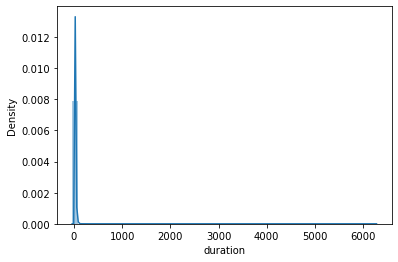

In [33]:
sns.distplot(df.duration)

In [35]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    4.145257e+06
mean     1.598918e+01
std      2.729762e+01
min     -3.431667e+01
50%      1.246667e+01
95%      3.900000e+01
98%      5.421667e+01
99%      6.503333e+01
max      6.275833e+03
Name: duration, dtype: float64